# Project instructions

1.      Parse all text from the downloaded HTML files.
2.      Explore the parsed output to learn how job skills are described in online postings. We’ll pay particular attention to whether certain HTML tags are more associated with skill descriptions.
3.      Attempt to filter any irrelevant job postings from the dataset.
4.      Cluster job skills based on text similarity.
5.      Visualize the clusters using word clouds.
6.      Adjust clustering parameters, if necessary, to improve the visualized output.
7.      Compare the clustered skills to our resume(*) to uncover missing skills.

# Resume we'd like to compare postings to

Experience

1. Developed probability simulations using NumPy.
2. Assessed online ad-clicks for statistical significance using Permutation testing.
3. Analyzed disease outbreaks using common clustering algorithms.

Additional Skills

1. Data visualization using Matplotlib.
2. Statistical analysis using SciPy.
3. Processing structured tables using Pandas.
4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.
5. Extracting locations from text using GeonamesCache.
6. Location analysis and visualization using GeonamesCache and Basemap.
7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.
8. NLP analysis and text topic detection using Scikit-Learn.

In [67]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

# Import and parse the .html files
Keep the body both with and without the html tags

In [68]:
data = []
folder = r"C:\Users\balin\Desktop\magnimind-assignments\NLP job_posting project\data\job_postings"

for filename in os.listdir(folder):
    if filename.endswith('.html'):
        full_path = os.path.join(folder, filename)
        with open(full_path, 'r', encoding='utf-8') as f:
            soup = BeautifulSoup(f, 'lxml')
            title = soup.title.text if soup.title else 'No Title'
           
            body_text = soup.body.get_text(separator='\n', strip=True) if soup.body else ''
            body_html = soup.body.prettify() if soup.body else ''
            
            data.append({'filename': filename, 'title': title, 'body_text': body_text, 'body_html': body_html})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)


# Some basic dataset exploration

In [69]:
# Check for any nulls in the title
df[df['title'] == 'No Title']

,filename,title,body_text,body_html


In [70]:
print(df.columns)

Index(['filename', 'title', 'body_text', 'body_html'], dtype='object')


In [71]:
df.shape

(1458, 4)

In [72]:
df.head(10)

,filename,title,body_text,body_html
0,001b92395ed0fb62.html,"Data Scientist - Beavercreek, OH","Data Scientist - Beavercreek, OH\nData Scienti...","<body>\n <h2>\n Data Scientist - Beavercreek,..."
1,00321a48d04fe754.html,"Data Scientist - Seattle, WA 98101","Data Scientist - Seattle, WA 98101\nAre you in...","<body>\n <h2>\n Data Scientist - Seattle, WA ..."
2,0079c11b2611349f.html,"Data Scientist - Newark, CA","Data Scientist - Newark, CA\nData Scientist\nN...","<body>\n <h2>\n Data Scientist - Newark, CA\n..."
3,007d9d7b5c09d820.html,Patient Care Assistant / PCA - Med/Surg (Fayet...,Patient Care Assistant / PCA - Med/Surg (Fayet...,<body>\n <h2>\n Patient Care Assistant / PCA ...
4,00bf37ae19c7dfd7.html,"Data Manager / Analyst - Oakland, CA","Data Manager / Analyst - Oakland, CA\nHOW YOU ...",<body>\n <h2>\n Data Manager / Analyst - Oakl...
5,0125eabc844281c9.html,"Scientific Programmer - Berkeley, CA","Scientific Programmer - Berkeley, CA\nCaribou ...",<body>\n <h2>\n Scientific Programmer - Berke...
6,014ae4dbded805d2.html,JD Digits - AI Lab Research Intern - Mountain ...,JD Digits - AI Lab Research Intern - Mountain ...,<body>\n <h2>\n JD Digits - AI Lab Research I...
7,014ea972a4aa9812.html,Operations and Technology Summer 2020 Internsh...,Operations and Technology Summer 2020 Internsh...,<body>\n <h2>\n Operations and Technology Sum...
8,0179ea131f141400.html,PwC Labs - Jr. Data Scientist - Machine Learni...,PwC Labs - Jr. Data Scientist - Machine Learni...,<body>\n <h2>\n PwC Labs - Jr. Data Scientist...
9,018866568cd5a0b0.html,"Data and Reporting Analyst - Olympia, WA 98501","Data and Reporting Analyst - Olympia, WA 98501...",<body>\n <h2>\n Data and Reporting Analyst - ...


In [73]:
df.describe()


,filename,title,body_text,body_html
count,1458,1458,1458,1458
unique,1458,1364,1457,1457
top,_p.html,"Data Scientist - New York, NY","Physics Data Scientist - Foothill Ranch, CA\nT...",<body>\n <h2>\n Physics Data Scientist - Foot...
freq,1,13,2,2


In [74]:
# get simple statistics about length of body_text
df['body_text_length'] = df['body_text'].apply(len)
df['body_text_length'].describe()


count     1458.000000
mean      4222.222222
std       2052.157912
min         30.000000
25%       2904.250000
50%       3878.000000
75%       5042.000000
max      19040.000000
Name: body_text_length, dtype: float64

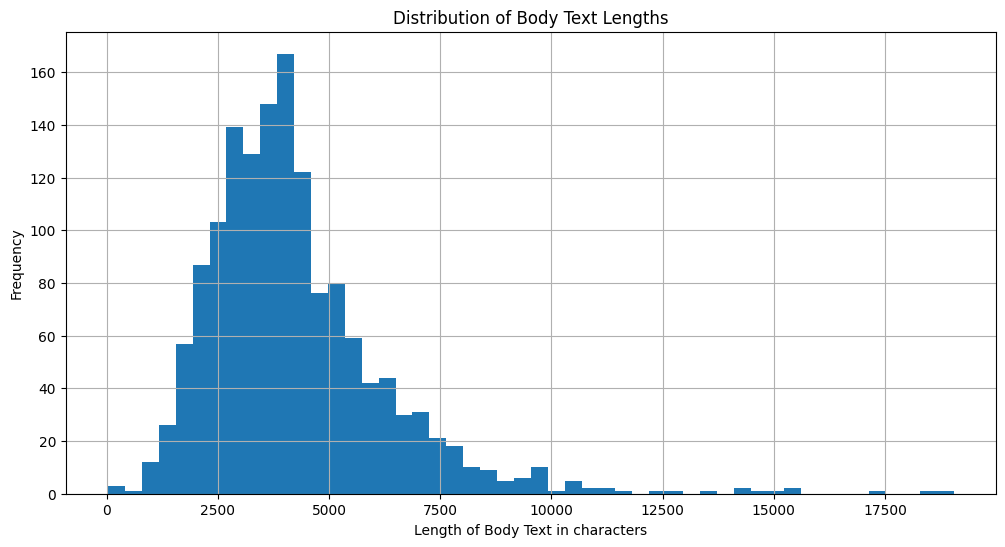

In [75]:
df['body_text_length'].hist(bins=50, figsize=(12, 6))
plt.title('Distribution of Body Text Lengths')
plt.xlabel('Length of Body Text in characters')
plt.ylabel('Frequency')
plt.show()

Some right-skew in the data, peak ~4000 characters inc. spaces, most fall between 2,000 and 7000 chars. some outliers w/very long descriptions

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          1458 non-null   object
 1   title             1458 non-null   object
 2   body_text         1458 non-null   object
 3   body_html         1458 non-null   object
 4   body_text_length  1458 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 57.1+ KB


In [77]:
# Any duplicates based on the 'body_text' column
df[df['body_text'].duplicated(keep=False)].shape[0]

2

In [78]:
df = df.drop_duplicates(subset=['body_text'], keep='first')

In [79]:
df.shape

(1457, 5)

# Clean the data

In [80]:
df['body_text'][df['filename'] == '0179ea131f141400.html'].values[0][:1000]

'PwC Labs - Jr. Data Scientist - Machine Learning (NLP) - Tampa, FL 33607\nPwC Labs is focused on standardizing, automating, delivering tools and processes and exploring emerging technologies that drive efficiency and enable our people to reimagine the possible. Process improvement, transformation, effective use of innovative technology and data & analytics, and leveraging alternative delivery solutions are key areas of focus to drive additional value for our firm. The AI Lab focuses on implementing solutions that impact efficiency and effectiveness of our technology functions. Process improvement, transformation, effective use of technology and data & analytics, and leveraging alternative delivery are key areas to drive value and continue to be recognized as the leading professional services firm. AI Lab is focused on identifying and prioritizing emerging technologies to get the most out of our investments.\nTo really stand out and make us ?t for the future in a constantly changing wo

In [81]:
# Split the title roughly into job title and location on the last separator 
split = df['title'].str.rsplit(' - ', n=1, expand=True)
df['job_title'] = split[0]
df['location']  = split[1].fillna('Unknown') # for no location

In [82]:
df.drop(columns=['title','filename'], inplace=True)

In [83]:
df.sample(10)

,body_text,body_html,body_text_length,job_title,location
1303,Data and Policy Analyst - Writer/Coordinator -...,<body>\n <h2>\n Data and Policy Analyst - Wri...,2304,Data and Policy Analyst - Writer/Coordinator,"Burlingame, CA 94010"
1189,"Leadership Partner, Data and Analytics - West ...","<body>\n <h2>\n Leadership Partner, Data and ...",8348,"Leadership Partner, Data and Analytics - West ...","Seattle, WA"
1233,"Data Scientist - New York, NY\nRevlon has deve...","<body>\n <h2>\n Data Scientist - New York, NY...",2708,Data Scientist,"New York, NY"
505,"Environmental Coordinator - Tempe, AZ\nCircle ...",<body>\n <h2>\n Environmental Coordinator - T...,2372,Environmental Coordinator,"Tempe, AZ"
1055,"Manager, Data Scientist, Natural Language Proc...","<body>\n <h2>\n Manager, Data Scientist, Natu...",5371,"Manager, Data Scientist, Natural Language Proc...","Seattle, WA 98101"
1294,"Data Engineer - New York, NY\nJob Description\...","<body>\n <h2>\n Data Engineer - New York, NY\...",2183,Data Engineer,"New York, NY"
1186,"Sr. Associate, Natural Language Processing Dat...","<body>\n <h2>\n Sr. Associate, Natural Langua...",5094,"Sr. Associate, Natural Language Processing Dat...","Dallas, TX 75201"
959,"Senior Front End Engineer - New York, NY\nProm...",<body>\n <h2>\n Senior Front End Engineer - N...,2336,Senior Front End Engineer,"New York, NY"
569,Health Services Data & Reporting Analyst - San...,<body>\n <h2>\n Health Services Data &amp; Re...,9726,Health Services Data & Reporting Analyst,"Santa Rosa, CA 95404"
1301,"Assistant Research Professor, Computational Si...","<body>\n <h2>\n Assistant Research Professor,...",6070,"Assistant Research Professor, Computational Si...","Orlando, FL"


In [84]:
def strip_header(row):
    """Remove job title and location header from job description body"""
    body_text, job_title, location = row['body_text'], row['job_title'], row['location']
    header = f"{job_title} - {location}"
    
    # If body starts with the exact header, remove it cleanly
    if body_text.startswith(header):
        return body_text[len(header):].lstrip('\n')
    
    # Otherwise keep the original text
    return body_text

df['body_text'] = df.apply(strip_header, axis=1)


In [85]:
df.sample(10)

,body_text,body_html,body_text_length,job_title,location
1109,Our company\nChanging the world through digita...,<body>\n <h2>\n Data Scientist - San Francisc...,4083,Data Scientist,"San Francisco, CA"
1386,Faire is using machine learning to change whol...,<body>\n <h2>\n Lead Data Scientist - Ranking...,4798,Lead Data Scientist - Ranking Algorithms,"San Francisco, CA"
707,"Summary\nPosted:\nSep 17, 2019\nWeekly Hours:\...",<body>\n <h2>\n Machine Learning - Operations...,4370,Machine Learning - Operations,"Santa Clara Valley, CA 95014"
576,Summary:\nA proven leader who is passionate ab...,"<body>\n <h2>\n Director, Data Engineering - ...",1984,"Director, Data Engineering","New York, NY"
380,The Bank of New York Mellon seeks Senior Speci...,"<body>\n <h2>\n SrSpec, Model Dev - New York,...",2808,"SrSpec, Model Dev","New York, NY"
571,The Oakland IRC’s Health and Wellness programs...,"<body>\n <h2>\n Wellness Promoter - Oakland, ...",4548,Wellness Promoter,"Oakland, CA 94610"
682,PlayStation isn't just the Best Place to Play ...,<body>\n <h2>\n Data Science Intern - San Mat...,2647,Data Science Intern,"San Mateo, CA"
335,A BIT ABOUT OUR DATA SCIENCE & ANALYTICS TEAM\...,"<body>\n <h2>\n Data Scientist - New York, NY...",3502,Data Scientist,"New York, NY"
934,Job Requisition Number:\n20190819J4\nJob Title...,<body>\n <h2>\n Senior Engineer (Software) - ...,3024,Senior Engineer (Software),"San Diego, CA 92110"
662,Who we are:\nBraviant is a leading provider of...,"<body>\n <h2>\n Data Science Lead - Chicago, ...",4039,Data Science Lead,"Chicago, IL"


In [86]:
df['body_html'].iloc[3][:1000]

'<body>\n <h2>\n  Patient Care Assistant / PCA - Med/Surg (Fayette, AL) - Fayette, AL\n </h2>\n <h1 class="jobSectionHeader">\n  <b>\n   Performance Planning\n  </b>\n </h1>\n <p>\n  Provides personal care and support services under the supervision of a registered nurse that assists the patient in the achievement of physical and emotional comfort.\n </p>\n <h1 class="jobSectionHeader">\n  <b>\n   Key Responsibilities/Essential Functions\n  </b>\n </h1>\n <ul>\n  <li>\n   Provides all personal care services in accordance with the plan of treatment assigned by the registered nurse\n  </li>\n  <li>\n   Accurately documents care provided\n  </li>\n  <li>\n   Applies safety principles and proper body mechanics to the performance of specific techniques of personal and supportive care, such as ambulation of patients, transferring patients, assisting with normal range of motions and positioning\n  </li>\n  <li>\n   Participates in economical utilization of supplies and ensures that equipment a

## Job title analysis

Have a look at most common words in job titles

In [87]:
# Extract common terms from job titles
from collections import Counter
import re

# Tokenize job titles
def tokenize(text):
    return re.sub(r'[^\w\s]', ' ', text.lower()).split()

# Flatten all tokenized words from job titles
all_words = [word for title in df['job_title'] for word in tokenize(title)]

word_counts = Counter(all_words)

# Display top 20 word counts
print("Most common words in job titles:")
print(word_counts.most_common(10))

Most common words in job titles:
[('data', 749), ('scientist', 447), ('analyst', 189), ('engineer', 188), ('and', 174), ('science', 128), ('senior', 123), ('intern', 102), ('analytics', 83), ('manager', 82)]


In [88]:
df['job_title'].value_counts()

job_title
Data Scientist                      157
Senior Data Scientist                33
Data Analyst                         20
Data Engineer                        15
Machine Learning Engineer            12
                                   ... 
Senior Statistician                   1
Cyber Intelligence Analyst            1
Data & Tableau Reporting Analyst      1
Python Systems Engineer               1
Data Scientist - Oil and Gas          1
Name: count, Length: 1119, dtype: int64

Lots of different job titles with many similar roles having slightly different names. Will start by grouping these together ins ome way 

In [89]:
# Function to classifty job titles into categories
def classify_job_title(title):
    title = title.lower()
    categories = []
    if any(keyword in title for keyword in ['analyst', 'analytics']):
        categories.append('Data Analysis')
    if any(keyword in title for keyword  in ['scientist', 'science']):
        categories.append('Data Science')
    if any (keyword in title for keyword in ['engineer','engineering']):
        categories.append('Data Engineering')
    if any(keyword in title for keyword in ['machine learning', 'ml']):
        categories.append('Machine Learning')
    if any(keyword in title for keyword in ['developer', 'programmer', 'programming', 'dev', 'software']):
        categories.append('Software Development')
    if any(keyword in title for keyword in ['researcher','research']):
        categories.append('Research')
    if any(keyword in title for keyword in ['manager', 'management']):
        categories.append('Management')
    if any(keyword in title for keyword in ['consultant', 'consulting']):
        categories.append('Consulting')
    if any(keyword in title for keyword in ['nurse', 'nursing']):
        categories.append('Nursing')
    
    if not categories:
       categories.append('Other')
    
    return categories

# Apply the function to the job_title column
df['job_categories'] = df['job_title'].apply(classify_job_title)
# Get all unique categories
all_categories = set()
for categories in df['job_categories']:
    all_categories.update(categories)

# Create binary columns for each category
for category in all_categories:
    df[f'is_{category.replace(" ", "_")}'] = df['job_categories'].apply(lambda x: category in x)


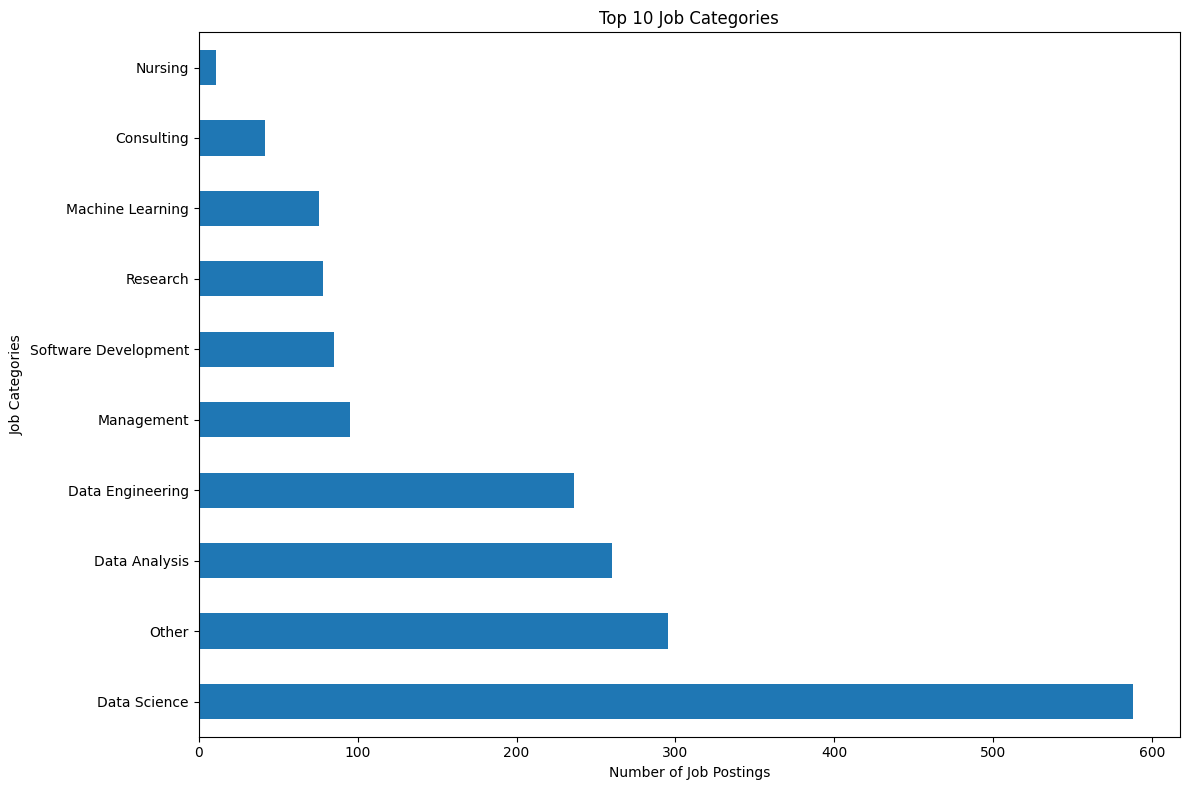

In [90]:
category_counts = df.explode('job_categories')['job_categories'].value_counts().head(10)

# Plot the top 10
category_counts.plot(kind='barh', figsize=(12, 8))
plt.title('Top 10 Job Categories')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Categories')
plt.tight_layout()
plt.show()

Have a look at 'other' category to see whether other groups jump out

In [91]:
others_jobs = df[df['is_Other'] == True]
others_jobs['job_title'].value_counts().sample(10)

job_title
Walmart Retail Link Associate - MIA                                           1
Recruiter                                                                     1
Global Strategic Insights Lead                                                1
Financial Advisory Services Complex Financial Instruments Senior Associate    1
Actuary                                                                       1
Unix Adminstrator                                                             1
Summer Intern - Logistics and Infrastructure                                  1
Human Resources Technician (Health Care Services Agency)                      1
Patient Attendant Safety, FT, Days                                            1
Patient Services Rep II                                                       1
Name: count, dtype: int64

Have a look at the distribution of seniorty of roles

In [92]:
def extract_seniority(title):
    title = title.lower()
    
    if any(level in title for level in ['senior', 'sr', 'sr.', 'principal']):
        return 'Senior'
    elif any(level in title for level in ['junior', 'jr', 'jr.', 'associate','intern', 'entry-level','assistant']):
        return 'Junior'
    elif any(level in title for level in ['lead', 'head', 'chief', 'director', 'manager', 'president', 'vp']):
        return 'Leadership'
    else:
        return 'Mid-level'

df['seniority'] = df['job_title'].apply(extract_seniority)
seniority_counts = df['seniority'].value_counts()
print(seniority_counts)

seniority
Mid-level     898
Junior        236
Senior        183
Leadership    140
Name: count, dtype: int64


In [93]:
df[df['seniority'] == 'Mid-level']['job_title'].value_counts().sample(10)

job_title
Open Source Staff Machine Learning Engineer        1
Events & Communication Specialist -                1
Data Scientist I-III                               1
Environmental, Health and Safety Specialist III    1
Business Reporting and Data Analyst                1
Data Science Engineer                              1
Data Scientist, Analytics - Community Integrity    1
ENGINEER/SCIENTIST                                 1
Data Scientist, Engineering                        2
Data Scientist (PhD)                               1
Name: count, dtype: int64

# 1: Look at html tags and associations with skills

Count the total number of all tags across the corpus

In [94]:
# identify the tags and their counts in the HTML body corpus
tag_counter = Counter()

for html in df['body_html']:
    soup = BeautifulSoup(html, 'lxml')
    tags = [tag.name for tag in soup.find_all()]
    tag_counter.update(tags)

tag_counter.most_common(10)

[('li', 25186),
 ('div', 14149),
 ('p', 11620),
 ('br', 10756),
 ('b', 7789),
 ('ul', 5074),
 ('h2', 2066),
 ('html', 1457),
 ('body', 1457),
 ('i', 593)]

In [104]:
# Identify skill related texty
skill_keywords = ['proficient', 'proficiency', 'experience',  'knowledge', 'python', 'java', 'sql', 'r', 'c++', 'javascript', 'html', 'css', 'machine learning', 
                  'deep learning', 'data analysis', 'data visualization', 'big data', 'cloud computing', 'aws', 'azure', 'docker', 'kubernetes', 'git']


# filter out high level tags 
target_tags = {'li', 'p', 'span', 'b', 'strong', 'h2', 'h3', 'h4','h5'}
# create counters for overall tag use and one for skill related tags
skill_tag_counter = Counter()
overall_tag_counter = Counter()

for html in df['body_html']:
    soup = BeautifulSoup(html, 'lxml')
    
    for tag in soup.find_all():
        tag_name = tag.name

        if tag_name not in target_tags:
            continue
        # Count the tag only if it is not in the skip list
        tag_text = tag.get_text(strip=True).lower()

        # Always count this tag in the total
        overall_tag_counter[tag_name] += 1

        # Only count it as a "skill-tag" if it contains a keyword
        if any(kw in tag_text for kw in skill_keywords):
            skill_tag_counter[tag_name] += 1


In [105]:
# Combine the two counters into a DataFrame for easier analysis
tag_df = pd.DataFrame([{'tag': tag, 'overall_count': overall_tag_counter[tag], 'skill_count': skill_tag_counter[tag], 'percentage': (skill_tag_counter[tag]/overall_tag_counter[tag]) * 100 if overall_tag_counter[tag] > 0 else 0}
                       for tag in overall_tag_counter
                       ])

tag_df.sort_values(by = 'percentage', ascending = False).head(10)

,tag,overall_count,skill_count,percentage
3,li,25186,24425,96.978480
5,h5,56,50,89.285714
0,h2,2066,1688,81.703775
6,h4,60,43,71.666667
1,p,11620,7785,66.996558
2,b,7789,5118,65.708050
4,h3,344,224,65.116279


Looks like skills are often embedded in `<li>` inside `<ul>`, which makes sense? I could also track and compare usage between technical vs. soft skill keywords inside these tags.


In [106]:
# Have a look at a few <li> tags as sanity check
import random
from itertools import chain

def extract_li_tags(html):
    soup = BeautifulSoup(html, 'lxml')
    return [li.get_text(strip=True) for li in soup.find_all('li')]

df['li_skills'] = df['body_html'].apply(extract_li_tags)

all_li_phrases = list(chain.from_iterable(df['li_skills']))
sampled_li = random.sample(all_li_phrases, 10)
print("Sampled <li> tags:")
for li in sampled_li:
    print(f"- {li}")

Sampled <li> tags:
- Extract data from a variety of sources for use in analysis and models; completes ad-hoc reporting and data analysis
- Intellectual curiosity and aptitude to pick up new technical skills
- Develop and evaluate staff to ensure the efficient operation of the department
- Design and coordinate production of key deliverables and help map out the learning journey for managers throughout their time in Google. Oversee all design work to ensure it is integrated, consistent and aligned with the People Operations brand
- Optimize funnels to reduce friction and drive the best possible experience for users who are going through any product flows necessary to become users of our products and services.
- Design, develop, and maintain reports & dashboards using data visualization tools
- Analytical visualizations of data from National Poison Control Centers
- Experience optimizing, testing, and documenting results of machine learning models
- Experience with survey sampling method

# 2: Filter out irrelevant job postings

Looking at the resume skills, it looks like relevant jobs for the person are in the field of data science and machine learning, potentially also data engineering and research. From my EDA of job titles, I can filter out job titles that do not fall into these categories

In [98]:
df_filtered = df[(df['is_Data_Analysis'] == True) | (df['is_Data_Science'] == True) | (df['is_Data_Engineering'] == True) | (df['is_Machine_Learning'] == True)  | (df['is_Research'] == True)]
df_filtered.shape

(1055, 18)

Filtering has reduced dataset size by about a third

I could also filter by seniority (likely this person is interested in mid-level roles, could filter out the juniour and leadership roles for example)

# Cluster job skills based on text similarity.

In [ ]:
#Preprocess li phrases
def clean_skill(skill):
    skill = skill.lower()
    skill = re.sub(r'[^a-z0-9\s]', '', skill)  # remove punctuation
    return skill.strip()

cleaned_skills = list(set([clean_skill(skill) for skill in all_li_phrases if len(skill.strip()) > 2]))
cleaned_skills[:10]


['',
 'identify supplies needed to perform tasks and report needs to supervisor',
 'work closely with researchers and engineers by providing linguistic expertise and direction for language specific nlp automatic speech recognition asr or text to speech tts projects andor dialogue analysismodelling',
 'analyze customer based results and behaviors within email mobile and direct mail marketing campaigns providing conclusions and recommendations',
 'proficiency in machine learning modeling and statistical thinking random forest decision trees supervised and unsupervised modeling etc',
 'familiarity with analytical techniques such as random forest gradient boosting svm nlp',
 'work with the science faculty to ensure experimental materials are set up in advance of the labs',
 'knowledge of healthcare',
 'ability to travel 20',
 'threat intelligence abuse detection and investigation experience']

In [107]:
# Vectorise with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_skills)

In [108]:
# Cluster with KMeans
from sklearn.cluster import KMeans

n_clusters = 10  # tune this with elbow/silhouette method?
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

C:\Users\balin\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\balin\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Program Files\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,

K-means: fast, easy to apply, works well when clusters are compact, spherical and similar in size
Expectation-Maximisation (EM): often used with Gaussian Mixture models, handles clusters with different shapes, sizes, and orientations
- consider: scaling data, using PCA before clustering, and selecting number of clusters using BIC, AIC, silhouette score

In [109]:
clustered = pd.DataFrame({
    'skill': cleaned_skills,
    'cluster': labels
})

# See samples per cluster
for i in range(n_clusters):
    print(f"\n🧩 Cluster {i}")
    print(clustered[clustered['cluster'] == i]['skill'].sample(10, random_state=42).tolist())


🧩 Cluster 0
['in depth knowledge of quality principles and technical tools problem analysis statistical tools design of experiments design for six sigma control charts and other quality methodologies with the ability to train and provide consultation', 'experience working with large data sets and distributed computing tools mapreduce hadoop hive spark etc', 'above average capabilities with cloud computing techniques or tools such as s3 ec2 emr sagemaker ecs lambda iam', 'experience using data visualization tools such as d3js tableau qlik or power bi is a strong plus', 'command of available online and offline tools to create engaging experiences that drive interactions and data opportunities', 'an eye for great data visualization experience on matplotlib plotly ggplot or tableau is a plus', 'experience with one or more business intelligence and visualization tools business objects tableau chartio jmp etc is a plus', 'fluent in sql python and r and data visualization tools eg tableau', 

In [111]:
#visualise with wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(n_clusters):
    text = ' '.join(clustered[clustered['cluster'] == i]['skill'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Skill Cluster {i}")
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'